In [105]:
import requests #send http requests to fetch live data
import pandas as pd #data manipulation and analysis
import matplotlib.pyplot as plt #plotting graphs
from datetime import datetime #date and time
import time#time-related operations
from scipy.stats import zscore
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
def fetch_price():  #words are connected using _ | etchPrice | FetchPrice
   try:
       url = 'https://api.coingecko.com/api/v3/simple/price?ids=bitcoin&vs_currencies=usd'
       response = requests.get(url)
       data = response.json()
       price = data['bitcoin']['usd']
       return price
   except Exception as e:
       print(f"Error while fetching the data: {e}")
       return None

In [5]:
price_log = pd.DataFrame(columns=['timestamp', 'price'])

In [7]:
price_log #Dataframe to represent data - empty as of now

,timestamp,price


In [9]:
for _ in range(30): # 30 values, each fetched in a gap of 10 sec
    now = datetime.now()
    price = fetch_price()
    if price: 
        price_log = pd.concat([price_log, pd.DataFrame([[now, price]], columns = ['timestamp','price'])])
        print(f"{now.strftime('%H:%M:%S')} -> ${price}")
    else:
        print(f"{now.strftime('%H:%M:%S')} -> Did not Fetch")
    time.sleep(10)

Error while fetching the data: 'bitcoin'
06:32:31 -> Did not Fetch
Error while fetching the data: 'bitcoin'
06:32:41 -> Did not Fetch
Error while fetching the data: 'bitcoin'
06:32:52 -> Did not Fetch


/var/folders/qt/pdwjmpj51qv8ht9ykdwhnrc80000gn/T/ipykernel_60723/2935461516.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  price_log = pd.concat([price_log, pd.DataFrame([[now, price]], columns = ['timestamp','price'])])


06:33:02 -> $119631
06:33:13 -> $119631
06:33:23 -> $119631
06:33:33 -> $119620
06:33:44 -> $119620
Error while fetching the data: 'bitcoin'
06:33:54 -> Did not Fetch
Error while fetching the data: 'bitcoin'
06:34:05 -> Did not Fetch
Error while fetching the data: 'bitcoin'
06:34:15 -> Did not Fetch
Error while fetching the data: 'bitcoin'
06:34:26 -> Did not Fetch
Error while fetching the data: 'bitcoin'
06:34:36 -> Did not Fetch
Error while fetching the data: 'bitcoin'
06:34:46 -> Did not Fetch
06:34:57 -> $119561
06:35:07 -> $119561
06:35:18 -> $119561
06:35:28 -> $119561
06:35:38 -> $119560
06:35:49 -> $119560
06:35:59 -> $119560
Error while fetching the data: 'bitcoin'
06:36:10 -> Did not Fetch
Error while fetching the data: 'bitcoin'
06:36:20 -> Did not Fetch
Error while fetching the data: 'bitcoin'
06:36:30 -> Did not Fetch
Error while fetching the data: 'bitcoin'
06:36:41 -> Did not Fetch
Error while fetching the data: 'bitcoin'
06:36:51 -> Did not Fetch
Error while fetching th

In [11]:
price_log

,timestamp,price
0,2025-07-23 06:33:02.664597,119631
0,2025-07-23 06:33:13.055856,119631
0,2025-07-23 06:33:23.512400,119631
0,2025-07-23 06:33:33.914862,119620
0,2025-07-23 06:33:44.540343,119620
0,2025-07-23 06:34:57.273522,119561
0,2025-07-23 06:35:07.664679,119561
0,2025-07-23 06:35:18.069772,119561
0,2025-07-23 06:35:28.475067,119561
0,2025-07-23 06:35:38.864298,119560


In [15]:
price_log['MA_5'] = price_log['price'].rolling(window=5).mean()

In [23]:
price_log['MA_5']

0         NaN
0         NaN
0         NaN
0         NaN
0    119626.6
0    119612.6
0    119598.6
0    119584.6
0    119572.8
0    119560.8
0    119560.6
0    119560.4
0    119558.4
0    119556.4
0    119554.6
Name: MA_5, dtype: float64

In [21]:
price_log['zscore'] = zscore(price_log['price'].fillna(method='bfill'))

/var/folders/qt/pdwjmpj51qv8ht9ykdwhnrc80000gn/T/ipykernel_60723/866790336.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  price_log['zscore'] = zscore(price_log['price'].fillna(method='bfill'))
/var/folders/qt/pdwjmpj51qv8ht9ykdwhnrc80000gn/T/ipykernel_60723/866790336.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  price_log['zscore'] = zscore(price_log['price'].fillna(method='bfill'))


In [25]:
price_log['zscore']

0    1.533331
0    1.533331
0    1.533331
0    1.198232
0    1.198232
0   -0.599116
0   -0.599116
0   -0.599116
0   -0.599116
0   -0.629580
0   -0.629580
0   -0.629580
0   -0.903751
0   -0.903751
0   -0.903751
Name: zscore, dtype: float64

In [89]:
price_log['anomaly'] = price_log['zscore'].apply(lambda x: abs(x) > 0.5)

In [91]:
price_log['anomaly']

0    True
0    True
0    True
0    True
0    True
0    True
0    True
0    True
0    True
0    True
0    True
0    True
0    True
0    True
0    True
Name: anomaly, dtype: bool

In [31]:
plt.figure(figsize=(12,6)) #inches

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

(array([20292.27291667, 20292.27326389, 20292.27361111, 20292.27395833,
        20292.27430556, 20292.27465278, 20292.275     , 20292.27534722,
        20292.27569444, 20292.27604167]),
 [Text(20292.272916666665, 0, '06:33:00'),
  Text(20292.27326388889, 0, '06:33:30'),
  Text(20292.27361111111, 0, '06:34:00'),
  Text(20292.273958333335, 0, '06:34:30'),
  Text(20292.274305555555, 0, '06:35:00'),
  Text(20292.274652777778, 0, '06:35:30'),
  Text(20292.275, 0, '06:36:00'),
  Text(20292.27534722222, 0, '06:36:30'),
  Text(20292.275694444445, 0, '06:37:00'),
  Text(20292.276041666668, 0, '06:37:30')])

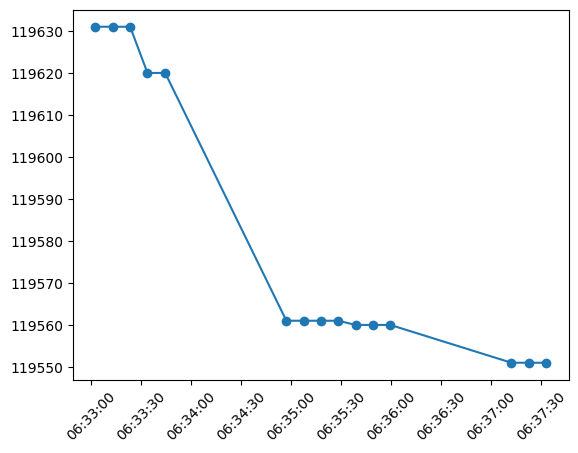

In [41]:
plt.plot(price_log['timestamp'],price_log['price'],label ='Price',marker='o')
plt.xticks(rotation = 45)

(array([20292.27361111, 20292.27395833, 20292.27430556, 20292.27465278,
        20292.275     , 20292.27534722, 20292.27569444, 20292.27604167]),
 [Text(20292.27361111111, 0, '06:34:00'),
  Text(20292.273958333335, 0, '06:34:30'),
  Text(20292.274305555555, 0, '06:35:00'),
  Text(20292.274652777778, 0, '06:35:30'),
  Text(20292.275, 0, '06:36:00'),
  Text(20292.27534722222, 0, '06:36:30'),
  Text(20292.275694444445, 0, '06:37:00'),
  Text(20292.276041666668, 0, '06:37:30')])

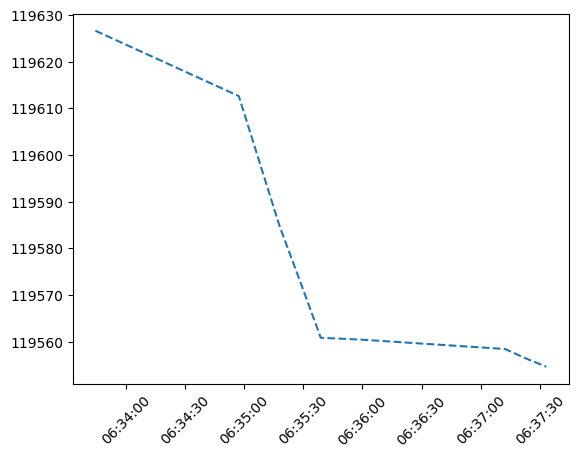

In [45]:
plt.plot(price_log['timestamp'],price_log['MA_5'],label='Moving Average 5', linestyle = '--')
plt.xticks(rotation = 45)

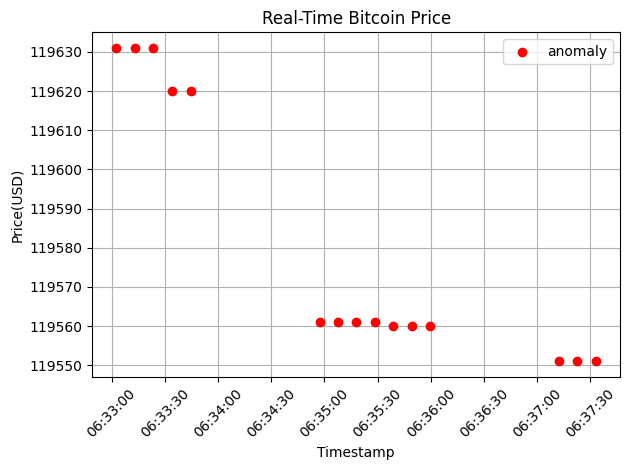

In [109]:
plt.scatter(price_log[price_log['anomaly']]['timestamp'],
           price_log[price_log['anomaly']]['price'],
           color='red', label='anomaly', zorder=5)
plt.xticks(rotation = 45)
plt.title("Real-Time Bitcoin Price")
plt.xlabel("Timestamp")
plt.ylabel("Price(USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.show()

In [75]:
price_log[price_log['anomaly']]['timestamp']

0   2025-07-23 06:33:02.664597
0   2025-07-23 06:33:13.055856
0   2025-07-23 06:33:23.512400
0   2025-07-23 06:33:33.914862
0   2025-07-23 06:33:44.540343
0   2025-07-23 06:34:57.273522
0   2025-07-23 06:35:07.664679
0   2025-07-23 06:35:18.069772
0   2025-07-23 06:35:28.475067
0   2025-07-23 06:35:38.864298
0   2025-07-23 06:35:49.257656
0   2025-07-23 06:35:59.663992
0   2025-07-23 06:37:12.345797
0   2025-07-23 06:37:22.779672
0   2025-07-23 06:37:33.253073
Name: timestamp, dtype: datetime64[ns]

In [73]:
price_log[price_log['anomaly']]['price']

0    119631
0    119631
0    119631
0    119620
0    119620
0    119561
0    119561
0    119561
0    119561
0    119560
0    119560
0    119560
0    119551
0    119551
0    119551
Name: price, dtype: object

/var/folders/qt/pdwjmpj51qv8ht9ykdwhnrc80000gn/T/ipykernel_60723/2949042927.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


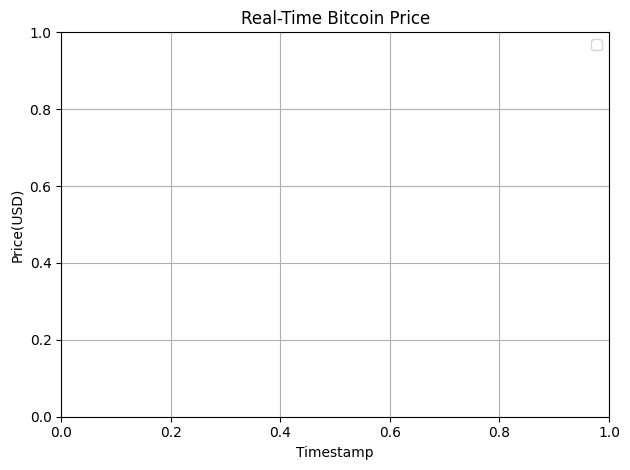

In [95]:
plt.title("Real-Time Bitcoin Price")
plt.xlabel("Timestamp")
plt.ylabel("Price(USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/qt/pdwjmpj51qv8ht9ykdwhnrc80000gn/T/ipykernel_60723/3606207218.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  decompose = seasonal_decompose(price_log['price'].fillna(method='bfill'),model='additive',period=5)
/var/folders/qt/pdwjmpj51qv8ht9ykdwhnrc80000gn/T/ipykernel_60723/3606207218.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  decompose = seasonal_decompose(price_log['price'].fillna(method='bfill'),model='additive',period=5)
/Users/devarsh/bda74/lib/python3.12/site-packages/statsmodels/tsa/seasonal.py:358: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xlim)


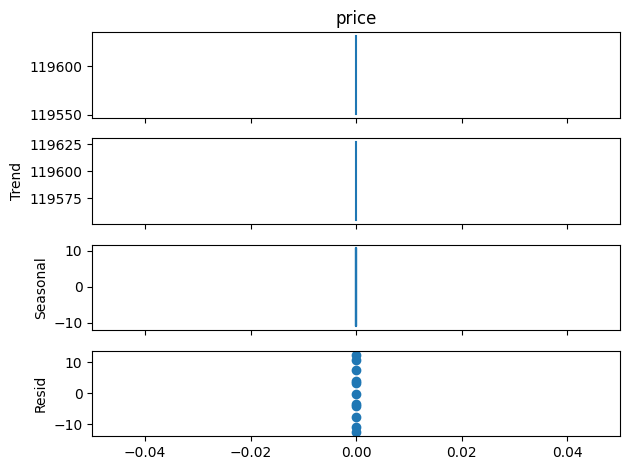

In [113]:
if len(price_log) >=10:
    try:
        decompose = seasonal_decompose(price_log['price'].fillna(method='bfill'),model='additive',period=5)
        decompose.plot()
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Decomposition Failed: {e}")

else:
    print("Not enough data ")
        